In [180]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
import pylab as pl
import seaborn as sns
from matplotlib import pyplot

In [181]:
df= pd.read_csv('appointment_data.csv')

In [182]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format='%Y-%m-%d %H:%M')

In [183]:
df['year']=df['ScheduledDay'].dt.year 
df['month']=df['ScheduledDay'].dt.month 
df['day']=df['ScheduledDay'].dt.day

In [184]:
df.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,year,month,day
0,No,1.328492e+12,5687610,F,2016-05-11 16:00:16+00:00,2016-05-19T00:00:00Z,25,MATA DA PRAIA,0,0,0,0,0,0,2016,5,11
1,No,3.881869e+14,5694484,M,2016-05-13 08:41:27+00:00,2016-05-17T00:00:00Z,62,FRADINHOS,0,0,0,0,0,0,2016,5,13
2,Yes,9.118992e+12,5500939,F,2016-03-22 11:09:38+00:00,2016-05-09T00:00:00Z,65,JARDIM CAMBURI,0,0,0,0,0,0,2016,3,22
3,No,1.843618e+14,5639080,M,2016-04-29 08:42:15+00:00,2016-04-29T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,2016,4,29
4,No,5.783198e+13,5671566,M,2016-05-06 18:47:52+00:00,2016-05-09T00:00:00Z,61,MARUÍPE,0,1,0,1,0,0,2016,5,6


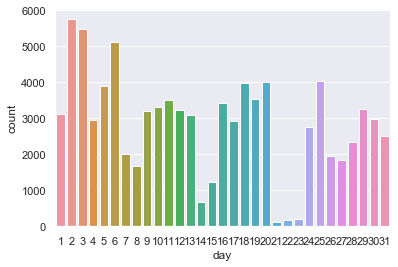

In [185]:
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data=df)

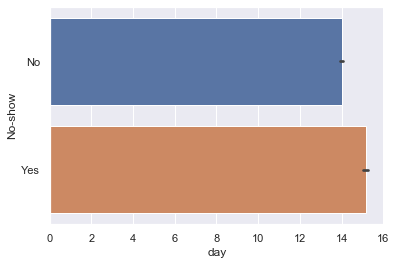

In [186]:
sns.barplot(data=df, x='day', y='No-show')

In [187]:
df1 = df[['No-show', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism','Handcap', 'SMS_received', 'AppointmentDay', 'month', 'day']]

In [188]:
df1.head(30)

,No-show,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay,month,day
0,No,F,25,MATA DA PRAIA,0,0,0,0,0,0,2016-05-19T00:00:00Z,5,11
1,No,M,62,FRADINHOS,0,0,0,0,0,0,2016-05-17T00:00:00Z,5,13
2,Yes,F,65,JARDIM CAMBURI,0,0,0,0,0,0,2016-05-09T00:00:00Z,3,22
3,No,M,41,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29T00:00:00Z,4,29
4,No,M,61,MARUÍPE,0,1,0,1,0,0,2016-05-09T00:00:00Z,5,6
5,No,F,11,DO QUADRO,1,0,0,0,0,0,2016-05-16T00:00:00Z,4,19
6,No,M,45,CRUZAMENTO,0,0,0,0,0,1,2016-05-04T00:00:00Z,4,29
7,No,M,9,MÁRIO CYPRESTE,0,0,0,0,0,1,2016-06-07T00:00:00Z,5,24
8,No,M,79,SOLON BORGES,0,0,0,0,0,0,2016-06-03T00:00:00Z,6,3
9,No,M,60,TABUAZEIRO,0,1,0,0,0,1,2016-05-10T00:00:00Z,5,6


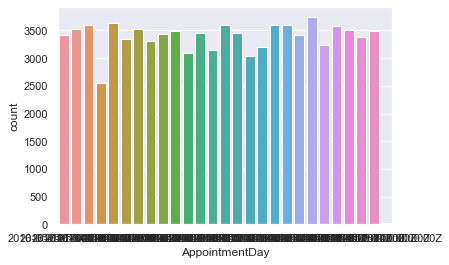

In [189]:
sns.set(style="darkgrid")
ax = sns.countplot(x="AppointmentDay", data=df1)

In [190]:
df1[df1.notnull()]

,No-show,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay,month,day
0,No,F,25,MATA DA PRAIA,0,0,0,0,0,0,2016-05-19T00:00:00Z,5,11
1,No,M,62,FRADINHOS,0,0,0,0,0,0,2016-05-17T00:00:00Z,5,13
2,Yes,F,65,JARDIM CAMBURI,0,0,0,0,0,0,2016-05-09T00:00:00Z,3,22
3,No,M,41,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29T00:00:00Z,4,29
4,No,M,61,MARUÍPE,0,1,0,1,0,0,2016-05-09T00:00:00Z,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88416,No,F,63,SÃO PEDRO,0,1,1,0,0,1,2016-05-10T00:00:00Z,5,5
88417,No,M,31,MARIA ORTIZ,0,0,0,0,0,0,2016-06-01T00:00:00Z,4,26
88418,No,F,38,ANDORINHAS,0,0,0,0,0,0,2016-06-08T00:00:00Z,6,2
88419,No,F,18,MARUÍPE,1,0,0,0,0,0,2016-04-29T00:00:00Z,4,29


In [191]:
df2= df1.dropna()

In [192]:
df2.head(30)

,No-show,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay,month,day
0,No,F,25,MATA DA PRAIA,0,0,0,0,0,0,2016-05-19T00:00:00Z,5,11
1,No,M,62,FRADINHOS,0,0,0,0,0,0,2016-05-17T00:00:00Z,5,13
2,Yes,F,65,JARDIM CAMBURI,0,0,0,0,0,0,2016-05-09T00:00:00Z,3,22
3,No,M,41,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29T00:00:00Z,4,29
4,No,M,61,MARUÍPE,0,1,0,1,0,0,2016-05-09T00:00:00Z,5,6
5,No,F,11,DO QUADRO,1,0,0,0,0,0,2016-05-16T00:00:00Z,4,19
6,No,M,45,CRUZAMENTO,0,0,0,0,0,1,2016-05-04T00:00:00Z,4,29
7,No,M,9,MÁRIO CYPRESTE,0,0,0,0,0,1,2016-06-07T00:00:00Z,5,24
8,No,M,79,SOLON BORGES,0,0,0,0,0,0,2016-06-03T00:00:00Z,6,3
9,No,M,60,TABUAZEIRO,0,1,0,0,0,1,2016-05-10T00:00:00Z,5,6


In [193]:
df2[df2.notnull()]

,No-show,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay,month,day
0,No,F,25,MATA DA PRAIA,0,0,0,0,0,0,2016-05-19T00:00:00Z,5,11
1,No,M,62,FRADINHOS,0,0,0,0,0,0,2016-05-17T00:00:00Z,5,13
2,Yes,F,65,JARDIM CAMBURI,0,0,0,0,0,0,2016-05-09T00:00:00Z,3,22
3,No,M,41,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29T00:00:00Z,4,29
4,No,M,61,MARUÍPE,0,1,0,1,0,0,2016-05-09T00:00:00Z,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88416,No,F,63,SÃO PEDRO,0,1,1,0,0,1,2016-05-10T00:00:00Z,5,5
88417,No,M,31,MARIA ORTIZ,0,0,0,0,0,0,2016-06-01T00:00:00Z,4,26
88418,No,F,38,ANDORINHAS,0,0,0,0,0,0,2016-06-08T00:00:00Z,6,2
88419,No,F,18,MARUÍPE,1,0,0,0,0,0,2016-04-29T00:00:00Z,4,29


In [194]:
#si crea un bel casino, poi elimina di nuovo quelle nulle
Z = df2['No-show']
le = preprocessing.LabelEncoder()
colonne = np.array(Z)
C=le.fit((Z))
H=list(le.classes_)
V=le.transform(Z)
V = V.reshape(-1,1)
dataset1 = pd.DataFrame({'No-show_num': V[:, 0]})

In [195]:
dataset1.head(30)

,No-show_num
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [196]:
E = df['Gender']
le = preprocessing.LabelEncoder()
colonne = np.array(E)
F=le.fit((E))
G=list(le.classes_)
I=le.transform(E)
I = I.reshape(-1,1)
dataset2 = pd.DataFrame({'Gender_num': I[:, 0]})

In [197]:
dataset2.head(30)

,Gender_num
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [198]:
B = df['Neighbourhood']
le = preprocessing.LabelEncoder()
colonne = np.array(B)
D=le.fit((B))
M=list(le.classes_)
N=le.transform(B)
N = N.reshape(-1,1)
dataset3 = pd.DataFrame({'Neighbourhood_num': N[:, 0]})

In [199]:
dataset3.head(30)

,Neighbourhood_num
0,45
1,24
2,38
3,43
4,44
5,19
6,14
7,48
8,73
9,78


In [200]:
L = df['AppointmentDay']
le = preprocessing.LabelEncoder()
colonne = np.array(L)
O=le.fit((L))
P=list(le.classes_)
Q=le.transform(L)
Q = Q.reshape(-1,1)
dataset4 = pd.DataFrame({'AppointmentDay_num': Q[:, 0]})

In [201]:
dataset4.head(30)

,AppointmentDay_num
0,15
1,13
2,6
3,0
4,6
5,12
6,3
7,25
8,23
9,7


In [202]:
df2.head(30)

,No-show,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay,month,day
0,No,F,25,MATA DA PRAIA,0,0,0,0,0,0,2016-05-19T00:00:00Z,5,11
1,No,M,62,FRADINHOS,0,0,0,0,0,0,2016-05-17T00:00:00Z,5,13
2,Yes,F,65,JARDIM CAMBURI,0,0,0,0,0,0,2016-05-09T00:00:00Z,3,22
3,No,M,41,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29T00:00:00Z,4,29
4,No,M,61,MARUÍPE,0,1,0,1,0,0,2016-05-09T00:00:00Z,5,6
5,No,F,11,DO QUADRO,1,0,0,0,0,0,2016-05-16T00:00:00Z,4,19
6,No,M,45,CRUZAMENTO,0,0,0,0,0,1,2016-05-04T00:00:00Z,4,29
7,No,M,9,MÁRIO CYPRESTE,0,0,0,0,0,1,2016-06-07T00:00:00Z,5,24
8,No,M,79,SOLON BORGES,0,0,0,0,0,0,2016-06-03T00:00:00Z,6,3
9,No,M,60,TABUAZEIRO,0,1,0,0,0,1,2016-05-10T00:00:00Z,5,6


In [203]:
df3 = pd.concat([dataset1, dataset2, dataset3, dataset4, df2], axis=1)

In [204]:
df3.head(30)

,No-show_num,Gender_num,Neighbourhood_num,AppointmentDay_num,No-show,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay,month,day
0,0,0,45,15,No,F,25,MATA DA PRAIA,0,0,0,0,0,0,2016-05-19T00:00:00Z,5,11
1,0,1,24,13,No,M,62,FRADINHOS,0,0,0,0,0,0,2016-05-17T00:00:00Z,5,13
2,1,0,38,6,Yes,F,65,JARDIM CAMBURI,0,0,0,0,0,0,2016-05-09T00:00:00Z,3,22
3,0,1,43,0,No,M,41,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29T00:00:00Z,4,29
4,0,1,44,6,No,M,61,MARUÍPE,0,1,0,1,0,0,2016-05-09T00:00:00Z,5,6
5,0,0,19,12,No,F,11,DO QUADRO,1,0,0,0,0,0,2016-05-16T00:00:00Z,4,19
6,0,1,14,3,No,M,45,CRUZAMENTO,0,0,0,0,0,1,2016-05-04T00:00:00Z,4,29
7,0,1,48,25,No,M,9,MÁRIO CYPRESTE,0,0,0,0,0,1,2016-06-07T00:00:00Z,5,24
8,0,1,73,23,No,M,79,SOLON BORGES,0,0,0,0,0,0,2016-06-03T00:00:00Z,6,3
9,0,1,78,7,No,M,60,TABUAZEIRO,0,1,0,0,0,1,2016-05-10T00:00:00Z,5,6


In [205]:
df3= df3.dropna()

In [206]:
df3.head(30)

,No-show_num,Gender_num,Neighbourhood_num,AppointmentDay_num,No-show,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay,month,day
0,0,0,45,15,No,F,25,MATA DA PRAIA,0,0,0,0,0,0,2016-05-19T00:00:00Z,5,11
1,0,1,24,13,No,M,62,FRADINHOS,0,0,0,0,0,0,2016-05-17T00:00:00Z,5,13
2,1,0,38,6,Yes,F,65,JARDIM CAMBURI,0,0,0,0,0,0,2016-05-09T00:00:00Z,3,22
3,0,1,43,0,No,M,41,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29T00:00:00Z,4,29
4,0,1,44,6,No,M,61,MARUÍPE,0,1,0,1,0,0,2016-05-09T00:00:00Z,5,6
5,0,0,19,12,No,F,11,DO QUADRO,1,0,0,0,0,0,2016-05-16T00:00:00Z,4,19
6,0,1,14,3,No,M,45,CRUZAMENTO,0,0,0,0,0,1,2016-05-04T00:00:00Z,4,29
7,0,1,48,25,No,M,9,MÁRIO CYPRESTE,0,0,0,0,0,1,2016-06-07T00:00:00Z,5,24
8,0,1,73,23,No,M,79,SOLON BORGES,0,0,0,0,0,0,2016-06-03T00:00:00Z,6,3
9,0,1,78,7,No,M,60,TABUAZEIRO,0,1,0,0,0,1,2016-05-10T00:00:00Z,5,6


In [207]:
y = df3[['No-show_num']]
X = df3[['Gender_num', 'Age', 'Neighbourhood_num', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism','Handcap', 'SMS_received', 'AppointmentDay_num', 'month', 'day']]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [209]:
X_train.head()

,Gender_num,Age,Neighbourhood_num,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay_num,month,day
4094,0,27,68,0,0,0,0,0,0,6,5,3
48028,0,0,48,0,0,0,0,0,0,2,5,3
72153,1,62,38,0,0,0,0,0,1,1,4,28
29090,0,85,68,0,1,1,0,0,0,16,5,16
52362,0,64,2,0,0,0,0,0,1,19,5,20


In [210]:
X_test.head()

,Gender_num,Age,Neighbourhood_num,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay_num,month,day
4773,1,40,60,0,0,0,0,0,1,19,5,24
42183,1,51,43,0,0,0,0,0,1,9,4,8
16508,0,48,27,1,0,0,0,0,0,8,5,11
53580,0,54,8,0,0,0,0,0,1,7,4,25
62573,1,65,44,0,1,0,0,0,1,1,4,25


In [211]:
y_train.head()

,No-show_num
4094,0
48028,0
72153,0
29090,1
52362,0


In [212]:
y_test.head()

,No-show_num
4773,1
42183,0
16508,0
53580,0
62573,0


In [213]:
train =  pd.concat([X_train, y_train], axis=1)

In [214]:
train.head(2)

,Gender_num,Age,Neighbourhood_num,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay_num,month,day,No-show_num
4094,0,27,68,0,0,0,0,0,0,6,5,3,0
48028,0,0,48,0,0,0,0,0,0,2,5,3,0


In [215]:
test =  pd.concat([X_test, y_test], axis=1)

In [216]:
test.head(2)

,Gender_num,Age,Neighbourhood_num,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDay_num,month,day,No-show_num
4773,1,40,60,0,0,0,0,0,1,19,5,24,1
42183,1,51,43,0,0,0,0,0,1,9,4,8,0


In [217]:
print(type(train))


<class 'pandas.core.frame.DataFrame'>


In [218]:
train.to_csv('train.csv')

In [219]:
print(type(test))

<class 'pandas.core.frame.DataFrame'>


In [220]:
test.to_csv('test.csv')

In [221]:
!pip freeze > requirements1.txt